# Graph Neural Networks for Cora Dataset
This file briefly explains **how to set up the environment and perform a simple run using the submitted code**. For detailed command-line arguments explanations, check `README.md`. For more details on theory and experiment, check `Report.pdf`. To see a complete setup-run procedure, check https://drive.google.com/file/d/1ZyLTXgGcWOLmPE0lKd1rb3FqZTy6wmnO/view?usp=sharing.

## Introduction
This file relates to a course project which aims to train and test multi-class classifiers on the [Cora Dataset](https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz). Here, we mainly focus on using GNNs (Graph Neural Networks) and compare different ideas of designing the network structure. We implement three GNNs, namely [GCN](https://arxiv.org/pdf/1609.02907.pdf), [GAT](https://arxiv.org/pdf/1710.10903.pdf) and [GaAN](https://arxiv.org/pdf/1803.07294.pdf).

The model implementation uses [PyTorch](https://pytorch.org/) and [Deep Graph Library](https://www.dgl.ai/).

## Note
For reference, our python version and GPU status are listed below: 

In [1]:
!python --version
!nvcc --version

Python 3.9.12
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Fri_Dec_17_18:28:54_Pacific_Standard_Time_2021
Cuda compilation tools, release 11.6, V11.6.55
Build cuda_11.6.r11.6/compiler.30794723_0


In [2]:
!nvidia-smi

Fri May 27 18:14:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.77       Driver Version: 512.77       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8     9W /  N/A |    153MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Dependencies
The required python packages are listed below:
- [Pytorch](https://pytorch.org/get-started/locally/) installed with CUDA support
- [DGL (Deep Graph Library)](https://www.dgl.ai/pages/start.html) installed with CUDA support
- numpy
- matplotlib

## 1. Installation

### 1.1 Get Project Code
If this file is opened in the code repository, then proceed to the next step. If this file is being examined in [**Google Colab**](https://colab.research.google.com/?utm_source=scs-index), then uncomment the following code block and run it to clone the code repository (The repository is currently private and will be opened publicly after the project submission deadline. If there is any problem, please send an email to petershen815@126.com).

In [ ]:
# !git clone https://github.com/WingsUpete/GNN4Cora

### 1.2 Set Up Environment

Install basic packages.

In [6]:
!python -m pip install numpy matplotlib

Install PyTorch and DGL.

In [7]:
!python -m pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [10]:
!python -m pip install dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html

Looking in links: https://data.dgl.ai/wheels/repo.html


### 1.3 Prepare Data

Move to the root directory if operating in **Google Colab** (if not, ignore the following line of code).

In [12]:
# %cd /content/GNN4Cora/

Prepare and preprocess the data.

In [1]:
import os
if not os.path.isdir('data'):
    print('> Creating "data" directory.')
    os.mkdir('data')
%cd preprocess/
!python CoraPreprocessor.py -dr ../data/cora/
%cd ../

D:\tmpStorage\IDA\Project\code\GNN4Cora\preprocess
> [CoraPreprocessor:init] CoraPreProcessor successfully initialized.
> [CoraPreprocessor:construct_pub_dict] Processing ../data/cora/cora.content
> [CoraPreprocessor:construct_pub_dict] Processing ../data/cora/cora.cites
> [CoraPreprocessor:construct_pub_dict] Collecting components to construct the publication dictionary...
> [CoraPreprocessor:construct_pub_dict] Publication dictionary saved to ../data/cora/meta.json
> [CoraPreprocessor:construct_graph] Constructing DGLGraph...
> [CoraPreprocessor:construct_graph] DGLGraph saved to ../data/cora/cora.dgl
D:\tmpStorage\IDA\Project\code\GNN4Cora


## 2. Model Training and Evaluation

As an example, we will show how to train and evaluate GaAN.

In [20]:
!python Trainer.py -dr data/cora/ -gid 0 -m trainNeval -net GaAN -tag GaAN

> Seed: 6666666
> device: cuda:0
> Loading DataSet from data/cora/
> Data sent to cuda:0
> view: both
> num_nodes: 2708, num_edges: [10556]
> num_feats: 1433, num_classes: 7
> num_samples: training = 270, validation = 812, test = 1626
> train_set_imbalance: {0: 28, 1: 35, 2: 79, 3: 50, 4: 22, 5: 20, 6: 36}
> Initializing the Training Model: GaAN
> Model Structure:
GaAN(
  (proj_fc): Linear(in_features=1433, out_features=128, bias=False)
  (embed_fc): Linear(in_features=128, out_features=128, bias=False)
  (layers): ModuleList(
    (0): ModuleList(
      (0): MultiHeadCGaANLayer(
        (cGaANs): ModuleList(
          (0): CGaANLayer(
            (Wa): Linear(in_features=128, out_features=128, bias=False)
            (att_out_fc_l): Linear(in_features=128, out_features=1, bias=False)
            (att_out_fc_r): Linear(in_features=128, out_features=1, bias=False)
            (gate_fc_l): Linear(in_features=128, out_features=1, bias=False)
            (gate_fc_m): Linear(in_features=128,

We specify the data folder as "data/cora/", GPU id as 0. "-m" specifies the training mode as "trainNeval", which means to evaluate the model right after training. "-tag" provides a tag string to the saved log file. The outputs are also saved to a log file so later on we can check it.

To evaluate a trained model, pass the ".pth" file to the trainer as follow:

In [2]:
!python Trainer.py -dr data/cora/ -gid 0 -m eval -e records/models/20220527_21_36_39.pth -tag GaAN

> Seed: 6666666
> device: cuda:0
> Loading DataSet from data/cora/
> Data sent to cuda:0
> view: both
> num_nodes: 2708, num_edges: [10556]
> num_feats: 1433, num_classes: 7
> num_samples: training = 270, validation = 812, test = 1626
> train_set_imbalance: {0: 28, 1: 35, 2: 79, 3: 50, 4: 22, 5: 20, 6: 36}
> Loading records/models/20220527_21_36_39.pth
> Model Structure:
GaAN(
  (proj_fc): Linear(in_features=1433, out_features=128, bias=False)
  (embed_fc): Linear(in_features=128, out_features=128, bias=False)
  (layers): ModuleList(
    (0): ModuleList(
      (0): MultiHeadCGaANLayer(
        (cGaANs): ModuleList(
          (0): CGaANLayer(
            (Wa): Linear(in_features=128, out_features=128, bias=False)
            (att_out_fc_l): Linear(in_features=128, out_features=1, bias=False)
            (att_out_fc_r): Linear(in_features=128, out_features=1, bias=False)
            (gate_fc_l): Linear(in_features=128, out_features=1, bias=False)
            (gate_fc_m): Linear(in_featur

The results might vary due to the randomness of dataset splitting (although a seed value is used, strangely).

To examine the training procedure as a figure, we plot the loss curve as follow:

D:\tmpStorage\IDA\Project\code\GNN4Cora\postprocess
Analyzing log file: ../records/logs/GaAN_trainNeval_20220527_21_36_39.log
Average train time: 0.5314 sec
Plotting loss curve.
Loss curve saved to ./GaAN_trainNeval_20220527_21_36_39.png
All analysis tasks finished.


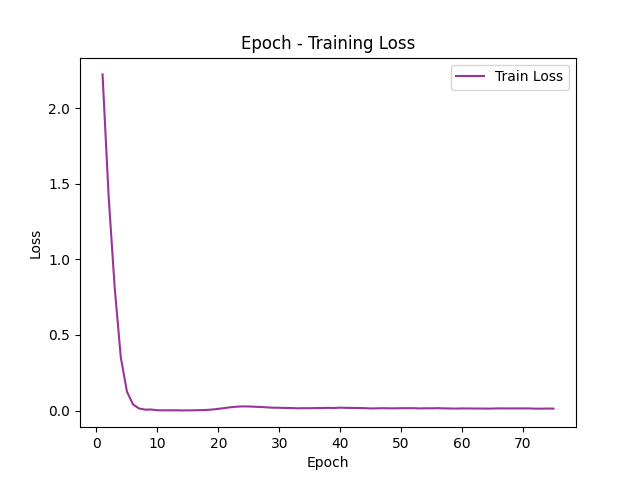

D:\tmpStorage\IDA\Project\code\GNN4Cora


In [3]:
%cd postprocess/
!python LossCurveRenderer.py -i ../records/logs/GaAN_trainNeval_20220527_21_36_39.log -o ./
from IPython.display import Image, display
display(Image(filename='GaAN_trainNeval_20220527_21_36_39.png'))
%cd ../

We can see that the loss of the implemented GaAN model quickly decreased and converged in less than 10 epochs.